# Chi-Squared Tests

For each of the previous lessons, we've worked with *numerical* data to peform the parametric tests:  t-tests, z-tests, ANOVA (F-test), correlation, and regression. In each of these, we've been able to compute our sample statistic and conduct hypothesis testing.

##### Reviewing Measurement Scales

See [descriptive statistics](./1.%20Descriptive%20Statistics.ipynb) lesson for a review.

For each of the following, which measurement scale does the independent variable belong.

* Years (e.g., 1848) that revolutions occurred
    * Answer: Interval
* College majors of Republicans and Democrats
    * Answer: Nominal
* Time it takes for rats to finsh a maze
    * Answer: Ratio
* Level in college (freshman, sophomore, junior, senior)
    * Answer: Ordinal

### Non-parametric Tests

In cases where we do not have parametric data, we need another way to speak statistically about our results. In these scenarios, we will use frequencies and proportions to compare our data.

One example is the Chi-Squared Test. $\chi$ is another Greek symbol that looks like $x$. This test will determine how well our observed frequencies match our expected frequencies for categorical data. Our expected frequencies will represent $H_0$.

##### Examples

1. We record the results of 100 people responding "Yes" or "No" to a survey.
2. We record 100 men and 100 women responding to a survey that asked if they prefer vacationing to the beach or mountains.

In these cases, we cannot speak about averages or standard deviations. Instead, we will use frequencies and proportions to compare the responses.

### $\chi^2$ Example

Suppose we want to climb Mount Shasta in California. According to Summitpost.org, 33% of all attempts to summit Mount Shasta are successful. However, a guide company, Summit Up, claims they had 41 successful climbs out of 100 the previous year.

Question: Should we hire this company? Alternatively stated, is the result from Summit Up significant or is it explainable by chance?

##### Step 1 - Identify the Null Hypothesis, $H_0$

Without considering Summit Up's data, what is the expected frequency we would expect for 100 climbers based on Summitpost.org's data?

| | Successful | Unsuccessful |
| --- | --- | --- |
| Expected Frequency | 33 | 67 |
| Observed Frequency | 41 | 59 |

$H_0$ is our expected frequency.

Using other scenarios, $H_0$ would be
* 50% of people prefer Coke/Pepsi
* 1000 males/females are present at an event with 2000 people
* Of 200 people, 50 people each like rap, pop, country, and house best

##### Step 2 - Determine how well our observed frequencies "fit" the expected frequencies

This is done using the $\chi^2$ goodness-of-fit test. We can do this by making a ratio of the expected frequency, $f_e$, using our observed frequency $f_o$ for each of our categories, "successful" and "unsuccessful" in this example.
$$\chi^2 = \sum\frac{(f_o-f_e)^2}{f_e}$$

We see that $\chi^2$ is smaller when $f_o$ is closer to $f_e$. When all observed values are equal to our expected values, $\chi^2=0$.

For this example, $\chi^2 = 2.89$.

##### Step 3 - Determine the degrees of freedom, $df$

Given the marginal frequencies of $100$ for expected frequency, $100$ for observed frequency, $74$ for successful attempts, and $126$ for unsuccessful attempts, how many degrees of freedom do we have?  
Answer: 1 - As soon as we pick a value for any one of our boxes in the above chart the rest of the values are fixed for a given set of marginal frequencies.

Generalizing, the number of degrees of freedom will be the number of categories minus 1. $$df = \text{number of categories} - 1$$

##### Step 4 - Compute $p$

Using [GraphPad QuickCalcs](http://www.graphpad.com/quickcalcs/), we can determine $p=0.089$.

##### Step 5 - Determine Result

Given $\alpha=0.05$, we see that $p \gt \alpha$ which means that our result is *not* significant, and therefore, we should *not* reject $H_0$.

### $\chi^2$ Test Properties

Given the equation above, we see that $\chi^2$ values are always positive, and therefore the $\chi^2$ test is one-directional. This is like our [one-way ANOVA test](./9.%20ANOVA%20F-Test.ipynb), and like the ANOVA test, our distribution will change as the degrees of freedom change.

As we add more categories, the *more* likely we'll get a larger $\chi^2$ statistic. To see why, we can generalize our equation for $m$ categories as
$$\chi^2 = \sum\limits_{i=1}^m\frac{(f_{oi}-f_{ei})^2}{f_{ei}}$$
Intuitively, our sum will more likely be larger for, say, ten categories as opposed to two.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
%matplotlib inline

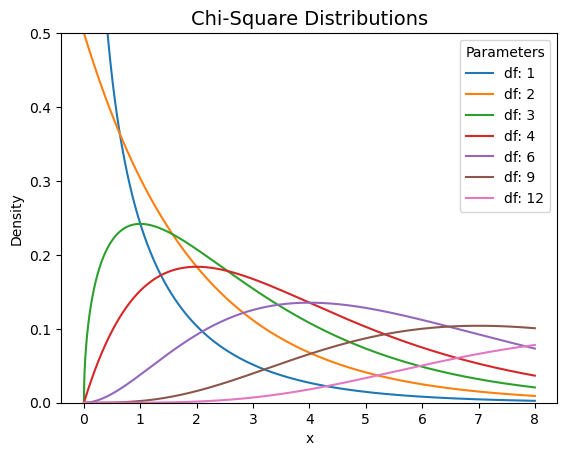

In [10]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 8, 0.001)

#define multiple Chi-square distributions
plt.plot(x, chi2.pdf(x, df=1), label='df: 1')
plt.plot(x, chi2.pdf(x, df=2), label='df: 2')
plt.plot(x, chi2.pdf(x, df=3), label='df: 3')
plt.plot(x, chi2.pdf(x, df=4), label='df: 4') 
plt.plot(x, chi2.pdf(x, df=6), label='df: 6') 
plt.plot(x, chi2.pdf(x, df=9), label='df: 9')
plt.plot(x, chi2.pdf(x, df=12), label='df: 12')

#set y-axis range
plt.ylim(0, 0.5)

#add legend to plot
plt.legend(title='Parameters')

#add axes labels and title
plt.title('Chi-Square Distributions', fontsize=14)
plt.xlabel('x')
plt.ylabel('Density')

#display plot
plt.show()

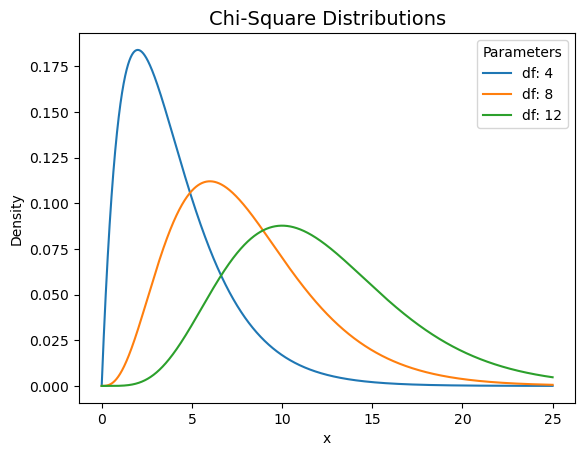

In [11]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 25, 0.001)

#define multiple Chi-square distributions
plt.plot(x, chi2.pdf(x, df=4), label='df: 4')
plt.plot(x, chi2.pdf(x, df=8), label='df: 8') 
plt.plot(x, chi2.pdf(x, df=12), label='df: 12') 

#add legend to plot
plt.legend(title='Parameters')

#add axes labels and a title
plt.ylabel('Density')
plt.xlabel('x')
plt.title('Chi-Square Distributions', fontsize=14)

#display the plot
plt.show()

For a given significance level, e.g., $\alpha=0.05$, we can see from this plot that our region of rejection shifts to larger $\chi^2$ values as our degrees of freedom increase. With more categories (i.e., degrees of freedom), $\chi^2$ is larger, and therefore, we need a higher critical value to reject the null hypothesis.

### $\chi^2$ Test for Independence

The $\chi^2$ test can also be used to assess whether two variables are independent.

##### Example

150 students at the University of Washington participated in a study in which they watched a car accident. The students were then split into three equal-size groups and asked three different questions.

* Group 1: "How fast were the cars going when they hit each other?"
* Group 2: "How fast were the cars going when they smashed into each other?"
* Group 3: Asked no questions about the speed of the cars

One week later, all the students were asked, "Did you observe any broken glass?" Although there was no broken glass shown in the clip, below are the results.

| | Hit | Smashed | Control | Total |
| --- | --- | --- | --- | --- |
| **Yes** | 7 | 16 | 6 | 29 |
| **No** | 43 | 34 | 44 | 121 |
| **Total** | 50 | 50 | 50 | 150 |

For this experiment, $H_0$: Students' response for whether or not hey saw broken glass is independent of the wording used in the question.

Now we compute the expected frequencies for the values in the table. To do so, we will use the marginal probabilities for "Yes" and "No" to compute the number of individuals we would have expected out of $50$ for each question.

$29/150 = .19\bar{3} * 50 = 9.6\bar{7}$  
$121/150 = .80\bar{6} * 50 = 40.\bar{3}$

| | Hit | Smashed | Control | Total |
| --- | --- | --- | --- | --- |
| **Yes** | 7 $${\color{red} 9.65}$$ | 16 $${\color{red} 9.65}$$ | 6 $${\color{red} 9.65}$$ | 29 |
| **No** | 43 $${\color{red} 40.33}$$ | 34 $${\color{red} 40.33}$$ | 44 $${\color{red} 40.33}$$ | 121 |
| **Total** | 50 | 50 | 50 | 150 |

In [13]:
yes = [7, 16, 6]
yes_expected = 9.67
no = [43, 34, 44]
no_expected = 40.33

#calculate chi-square statistic
chi_squared = 0
for i in range(3):
    chi_squared += (((yes[i] - yes_expected)**2)/yes_expected) + (((no[i] - no_expected)**2)/no_expected)
print('chi_squared:', chi_squared)

# calculate Cramer's V
n = sum(yes) + sum(no)
phi = chi_squared/n
r, k = 2, 3
cramer = np.sqrt(phi / min((k-1), (r-1)))
print('Cramer\'s V:', cramer)

chi_squared: 7.77795954830764
Cramer's V: 0.22771267785387853


$$\chi^2 = \sum\frac{(f_o-f_e)^2}{f_e} = 7.78$$

We can also see that $df=2$ as we can choose $2$ values for our questions before the third is fixed for a given marginal frequency for "Yes" or "No".

Using a [chi-square table](https://people.richland.edu/james/lecture/m170/tbl-chi.html), we see that 5.991 is the $X^2$ critical value for $\alpha=0.05$ and $df=2$. Thus, we should reject $H_0$ as our computed $X^2$ value is greater than the critical value.

### Effect Size

As with other statistical tests, we will likely not just want to know if two variables are independent but also the strength of their relationship, i.e., the effect size.

When we have a contingency table that is greater than $2 \times 2$, we use Cramer's V, also known as Cramer's Phi Coefficient and is symbolized by $\phi_c$,

$${\phi_c = \sqrt{\frac{\chi^2}{n(k-1)}},}$$

where $k$ is the smaller dimension (i.e., number of rows or column) in our table.

##### Example

Using our example above, we would find that
$$\phi_c = \sqrt{\frac{7.78}{150*1}} = .228$$

### Assumptions and Restrictions for Chi-Square Tests

* Avoid dependent observations
* Avoid smalle expected frequencies (large $n$)
    * As general rules of thumb, ensure $n \gt 20$, and for each expected frequency, $f_e \geq 5$.

### Quiz

Scenario

Jim hypothesizes that children will rank different TV shows higher if they are in color but that adults' rankings won't be affected by color.

##### Question 1
What is the dependent variable?  
Answer: TV rankings

##### Question 2
What is the scale of measurement for this dependent variable?  
Answer: Ordinal

##### Question 3
Specify the level of measurement for the following variables.  
Answer:

| | Nominal | Ordinal | Interval | Ratio |
| --- | --- | --- | --- | --- |
| Time to complete a 10k race | | | | x |
| Altitude relative to sea level | | | x | |
| Favorite color | x | | | |
| Rating of job satisfaction from 1 to 7 | | x | | |

##### Question 4
Specify the appropriate Chi-Square test for the following situations.

| | Goodness-of-fit | Test for Independence |
| --- | --- | --- |
| A political pollster wants to determine whether voters prefer Barack Obama or Mitt Romney. | x | |
| The General Social Survey asks men and women to identify their level of happiness (very happy, pretty happy, not too happy). | | x |
| a political scientist suspects that there is a relationship between the education level of adults (grade school, high school, college) and whether or not they favor gun control legislation. | | x |
| A cell phone company is testing three new interfaces for their phones. They provide all three phones to a sample of college students and ask them which interface they prefer. | x | |

Scenario

A die is suspected of being biased. To test this, you will roll the die 24 times and record the outcome of each roll. The results are presented in the following table.

| Outcome | Frequency |
| --- | --- |
| 1 | 8 |
| 2 | 4 |
| 3 | 1 |
| 4 | 8 |
| 5 | 3 |
| 6 | 0 |

##### Quesion 5
Which $\chi^2$ test would be most appropriate for this comparison?  
Answer: Goodness-of-fit because we have one nominal variable

##### Question 6
What are the degrees of freedom for this comparison?  
Answer: 5

##### Question 7
What is the critical $\chi^2$ value using $\alpha=0.05$?  
Answer: 11.070

[$\chi^2$ table](https://people.richland.edu/james/lecture/m170/tbl-chi.html)

##### Question 8
What is $\chi^2$?  
Answer: 14.5

##### Question 9
What is your statistical decision? Why?  
Answer: Reject the null because $\chi^2$ exceeds the critical value for $\alpha=0.05$, which suggests the die is biased.

Scenario

In 1912, over 800 passengers perished after the ocean liner Titanic collided with an iceberg and ank. The table below compares the survival frequencies of cabin (1st class) adn steerage (2nd class) passengers. We want to know if there is a relationship between the type of accomodation and survival rate.

| | Cabin | Steerage | Total |
| --- | --- | --- | --- |
| Yes | 299 | 186 | 485 |
| No | 280 | 526 | 806 |
| **Total** | 579 | 712 | 1291 |

##### Question 10
Which of the following best describes the null hypothesis?  
Answer: Type of accomodation and survival rate are independent

##### Question 11
Which chi-square test would be most appropriate for this comparison?  
Answer: Independence because we have two nominal variables

##### Question 12
How many degress of freedom are there for this comparison?  
Answer: 1

##### Question 13
What is the critical $\chi^2$ value using a significance level of $\alpha=0.05$?  
Answer: 3.841

##### Question 14
Compute $\chi^2$.  
Answer: 88.64

##### Question 15
What is your statistical decision? Why?  
Answer: Reject the null because $\chi^2$ exceeds the critical value for $\alpha=0.05$ which suggests the accomodations and survival rate are not independent.

In [14]:
cabin_yes_expected = 217.52
cabin_yes_observed = 299
steerage_yes_expected = 267.48
steerage_yes_observed = 186
cabin_no_expected = 361.48
cabin_no_observed = 280
steerage_no_expected = 444.52
steerage_no_observed = 526

#calculate chi-square statistic
chi_squared = 0
chi_squared += (((cabin_yes_observed - cabin_yes_expected)**2)/cabin_yes_expected) + (((steerage_yes_observed - steerage_yes_expected)**2)/steerage_yes_expected) + (((cabin_no_observed - cabin_no_expected)**2)/cabin_no_expected) + (((steerage_no_observed - steerage_no_expected)**2)/steerage_no_expected)
print('chi_squared:', chi_squared)

chi_squared: 88.64312287510269
